In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

## Construct the OptimalK class using the joblib backend
### Supported backends are:
- joblib
- multiprocessing (python builtin)
- None (use single core)

In [3]:
optK = OptimalK(parallel_backend='joblib')
optK

OptimalK(n_jobs=8, parallel_backend="joblib", algorithm="skl-kmeans")

## Create test data, with 3 cluster centers and call optimalK with a list of  clusters to fit to.

In [4]:
X, y = make_blobs(n_samples=int(1e5), n_features=2, centers=3, random_state=25)
print('Data shape: ', X.shape)

Data shape:  (100000, 2)


In [5]:
%%time
n_clusters = optK(pd.DataFrame(X), cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  3
CPU times: user 246 ms, sys: 92.2 ms, total: 338 ms
Wall time: 1min 5s


## A DataFrame of gap values with each passed cluster count is now available

In [6]:
optK.gap_df[["gap_value", "n_clusters"]].head()

,gap_value,n_clusters
0,0.280638,1.0
1,2.271872,2.0
2,2.486614,3.0
3,2.191536,4.0
4,2.141664,5.0


## Plot the n_clusters against their gap values.

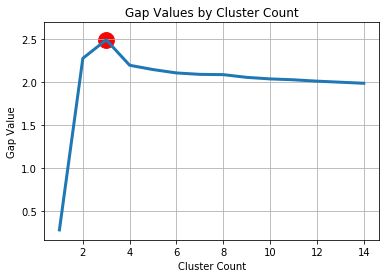

In [7]:
plt.plot(optK.gap_df.n_clusters, optK.gap_df.gap_value, linewidth=3)
plt.scatter(optK.gap_df[optK.gap_df.n_clusters == n_clusters].n_clusters,
            optK.gap_df[optK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

## `optimalK()` returns n_clusters, we can use that to fit the final KMeans model...

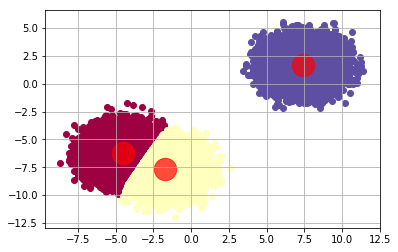

In [8]:
# Now that we have the optimal clusters, n, we build our own KMeans model...
km = KMeans(n_clusters)
km.fit(X)

df = pd.DataFrame(X, columns=['x','y'])
df['label'] = km.labels_

colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))

for color, label in zip(colors, df.label.unique()):
    
    tempdf = df[df.label == label]
    plt.scatter(tempdf.x, tempdf.y, c=color)
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], c='r', s=500, alpha=0.7, )
plt.grid(True)
plt.show()

### Notes:

Please be aware that, as the image above hints to, number of clusters can be subjective. This is merely meant to provide a suggestion to the number of clusters in your data; the true amount can vary depending upon your specific objective. The clusters here can be interpreted as three, but also clearly just two. Also due to random initialization, the suggested n_clusters could also vary.